# <a>Exploratory Data Analysis Project</a>

*Andraws Steve Santos - Data Scientist*

## <a> Motivation </a>

Every Data Science endeavor undergoes a critical phase. A profound understanding of the data, familiarity with distributions, key statistical measures, and the visualization of correlations and trends are essential elements for generating insights and addressing challenges.

This phase is genuinely *hybrid*, as it can be employed without a fully defined objective, in the quest for information and insights. Conversely, in a project with a well-defined business objective (Phase 1 of CRISP-DM), it precisely focuses on the business questions one aims to address.

## <a> Object of Study </a>

In this study, we will analyze the microdata from the National High School Exam (ENEM) conducted in 2019. According to information from the National Institute for Educational Studies and Research Anísio Teixeira (INEP), the ENEM aims to assess the academic performance of students upon completing basic education. ENEM scores play a crucial role, enabling access to the Unified Selection System (Sisu) and the University for All Program (ProUni). Additionally, these scores are recognized by more than 50 higher education institutions in Portugal. ENEM participants also have the opportunity to seek student financing through government programs, such as the Student Financing Fund (Fies). The ENEM results not only facilitate access to educational opportunities but also contribute to the development of studies and educational indicators.

Deepening our understanding of the data of exam candidates can provide valuable insights for Brazilian education. In this study, we will focus on evaluating possible correlations between demographic data, social indicators, parents' education levels, and other variables, and candidates' scores. The exploratory analysis of this data promises to reveal many fundamental insights and answers for the educational context.

In [4]:
# Importing libraries for data reading and chart creation
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

# Configuring pandas to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

# Configuring pandas to not show scientific notation for numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
# If your computer has limited memory or processing power, you can work with only 10% of the dataset. 
# The focus is on the processes rather than the data itself.
# df_enem = df_enem.sample(n=len(df_enem)//10, random_state=42, replace=False)

In [9]:
# Save the parquet file with 10% of the original size
# df_enem.to_parquet('./data/enem_2019_sample_10.parquet')

In [5]:
# Importing data
df_enem = pd.read_parquet('./data/enem_2019.parquet')

In [10]:
# First visualization of the data
df_enem.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.00,M,1,3,1,2914802.00,Itabuna,29.00,BA,1,11,1,NaN,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.00,M,1,1,1,2910800.00,Feira de Santana,29.00,BA,1,5,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.00,F,1,3,1,2304400.00,Fortaleza,23.00,CE,1,13,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.00,F,1,1,1,1721000.00,Palmas,17.00,TO,1,4,1,NaN,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1721000,Palmas,17,TO,1,1,1,1,504.00,510.00,513.00,516.00,483.80,503.60,537.30,392.00,BACCEEBEECDBEDDAEECDEDEADEBBCDBCAACADEEACCBBD,AECEDADAABAADBAADAEBACBAECCDAEADCDBBECCEDABCD,99999AAABEBBCCBDCAEECADBACAADAECCCDCCBAEBDEEEA...,DDBBBBCDCCDCAECCBBECDAEBADCD..CABCCECAEBDBBDA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.00,F,1,1,1,3118601.00,C

In [11]:
# Number of rows and columns
df_enem.shape

(5095270, 136)

In [12]:
# Check if we have a single registration per person
len(df_enem['NU_INSCRICAO'].unique())

5095270

In [13]:
# Check data types
df_enem.dtypes

NU_INSCRICAO                     int64
NU_ANO                           int64
CO_MUNICIPIO_RESIDENCIA          int64
NO_MUNICIPIO_RESIDENCIA         object
CO_UF_RESIDENCIA                 int64
SG_UF_RESIDENCIA                object
NU_IDADE                       float64
TP_SEXO                         object
TP_ESTADO_CIVIL                  int64
TP_COR_RACA                      int64
TP_NACIONALIDADE                 int64
CO_MUNICIPIO_NASCIMENTO        float64
NO_MUNICIPIO_NASCIMENTO         object
CO_UF_NASCIMENTO               float64
SG_UF_NASCIMENTO                object
TP_ST_CONCLUSAO                  int64
TP_ANO_CONCLUIU                  int64
TP_ESCOLA                        int64
TP_ENSINO                      float64
IN_TREINEIRO                     int64
CO_ESCOLA                      float64
CO_MUNICIPIO_ESC               float64
NO_MUNICIPIO_ESC                object
CO_UF_ESC                      float64
SG_UF_ESC                       object
TP_DEPENDENCIA_ADM_ESC   

In [15]:
# Let's save the columns with answers using a list comprehension for later removal, as we won't 
# analyze the test questions but rather the final score
columns_questions = [column for column in df_enem.columns if column.startswith('TX_')]
columns_questions

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [16]:
# Additionally, columns of type CO_ are not useful for our analysis, as they are just codes
columns_codes = [column for column in df_enem.columns if column.startswith('CO_')]
columns_codes


['CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [17]:
# We will not analyze by municipalities; instead, we will analyze by states (though it may be interesting to do so)
columns_municipalities = [column for column in df_enem.columns if 'MUNICIPIO' in column]
columns_municipalities


['CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [18]:
# Removing columns (registration number and year are not necessary)
columns_to_remove = columns_questions + columns_codes + columns_municipalities + ['NU_INSCRICAO', 'NU_ANO']
df_enem = df_enem.drop(columns_to_remove, axis=1)
df_enem.head()


,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,SP,36.00,M,1,3,1,BA,1,11,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,BA,23.00,M,1,1,1,BA,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,CE,39.00,F,1,3,1,CE,1,13,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,TO,25.00,F,1,1,1,TO,1,4,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,MG,22.00,F,1,1,1,MG,1,4,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B


In [19]:
# Number of rows and columns
df_enem.shape

(5095270, 109)

This process served only to remove variables that are not relevant to our analysis. Only now will we finally begin with the exploratory data analysis!


## <a> Starting with Descriptive Statistics </a>

Understanding statistical measures of central tendency, dispersion, percentiles, and distributions is essential to gain a better understanding of the data we are working with. What is the distribution by gender? Race? Geographic location?

Let's use the describe function to see the descriptive statistics. Note that this function only works for numeric variables and not for categorical ones. I haven't removed them because I know which ones they are, but feel free to do so.

In [21]:
# Descriptive statistics of numerical variables
df_enem.describe()


,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,5095201.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,2878197.00,5095270.00,1147412.00,1147412.00,1147412.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,3710433.00,3923145.00,3923145.00,3710433.00,5095270.00,3923144.00,3923144.00,3923144.00,3923144.00,3923144.00,3923144.00,3923144.00,5095270.00
mean,22.09,1.08,2.13,1.03,1.54,2.96,1.33,1.00,0.12,2.25,1.04,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.77,0.77,0.73,477.82,507.25,520.52,523.12,0.52,1.14,120.48,122.74,114.81,121.63,91.53,571.19,3.87
std,7.45,0.44,1.02,0.21,0.72,4.11,0.55,0.07,0.33,0.75,0.19,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.04,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.01,0.00,0.03,0.01,0.01,0.03,0.04,0.04,0.03,0.01,0.05,0.01,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.45,0.42,0.42,0.45,76.10,82.41,64.15,109.06,0.50,0.79,33.43,42.93,40.18,38.12,59.44,188.76,1.48
min,10.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,18.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,417.80,447.90,483.50,435.10,0.00,1.00,120.00,120.00,100.00,100.00,40.00,480.00,3.00
50%,19.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [22]:
# Let's analyze the scores; let's list them
columns_scores = [column for column in df_enem if 'NOTA' in column]
columns_scores


['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [23]:
# Let's remove the scores of the Writing Components (COMP), as they are components of the Essay (REDACAO).
# However, each COMP has interesting characteristics to analyze if desired.
columns_scores = [column for column in columns_scores if 'COMP' not in column]
columns_scores


['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

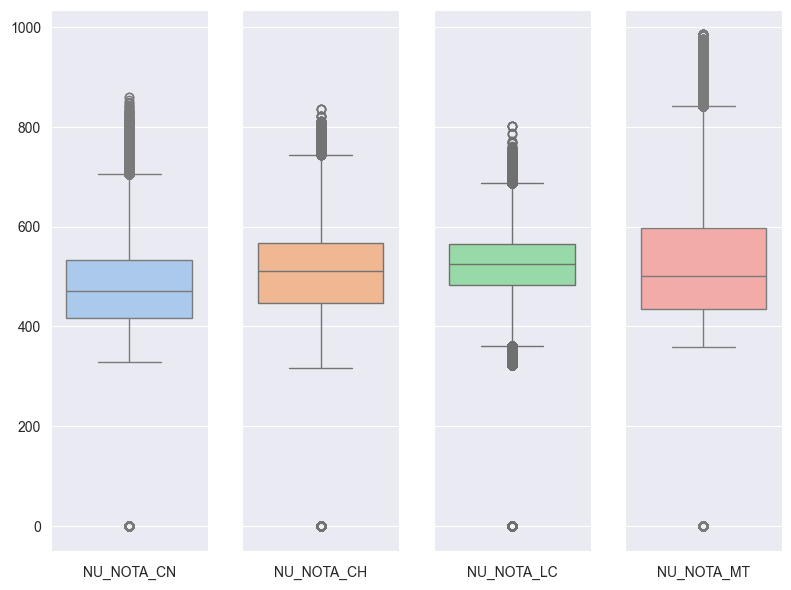

In [119]:
# Analyzing the scores with boxplot
sns.set_style("darkgrid")
figure, axes = plt.subplots(1, 4, sharey=True, figsize=(8, 6))
plt.tight_layout()

colors = sns.color_palette("pastel")

for i in range(4):
    column_1 = columns_scores[i]
    sns.boxplot(data=df_enem, y=column_1, ax=axes[i], color=colors[i])
    axes[i].set_xlabel(column_1)
    axes[i].set_ylabel('')

### <a> Considerations </a>

You may notice that the medians are not very distant from each other, with the CN score being the lowest and the LC score being the highest.

We observe that the dispersion in the LC scores is the smallest (distance from Q1 to Q3), while the MT score has a larger dispersion.

It's interesting to see that the "outliers" in the MT scores are higher than the others (the best scores among the 4 disciplines were clearly in MT). Only in LC do we have "outliers" downward.

We have scores of 0 in all subjects, probably from people who missed the exam and also from people who scored 0 on the test.

Now, let's visualize the distribution of scores, as the boxplot can be a bit deceiving in our visualization

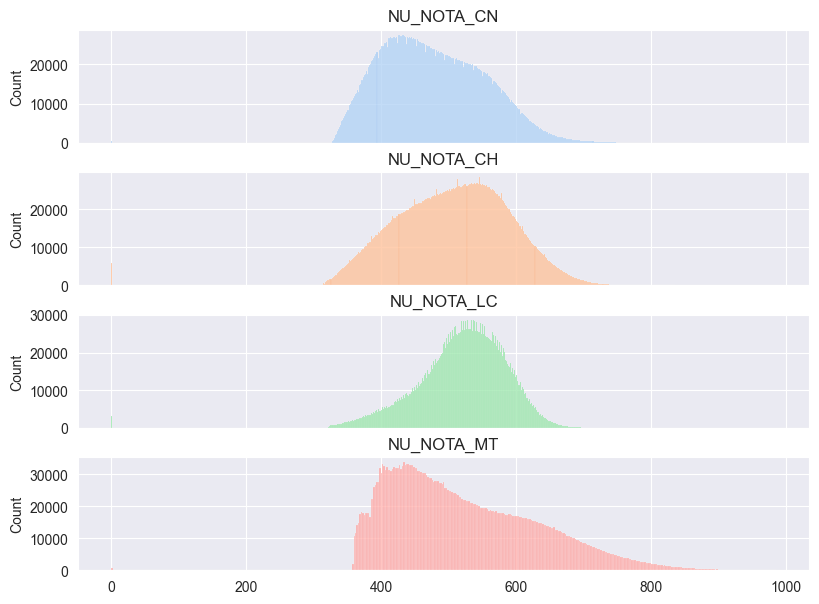

In [33]:
# Analyzing the distributions of scores
sns.set_style("darkgrid")
figure, axes = plt.subplots(4, 1, sharex=True, figsize=(8, 6))
plt.tight_layout()

for i in range(4):
    column_1 = columns_scores[i]
    sns.histplot(data=df_enem[column_1], ax=axes[i], color=colors[i]).set_title(column_1)
    axes[i].set_xlabel('')

### <a> Considerations </a>

We can say that the CN and MT scores are more concentrated to the left (more median scores) and that the CH and LC scores are more concentrated to the right (higher scores). We also see that the best scores are clearly in MT.

The distribution of LC may resemble a normal distribution but with a longer tail to the left. (It is necessary to test the distribution).

So, we can then confirm what we analyzed with the boxplots in a simpler and more illustrative visualization.

Text(0, 0.5, 'Count')

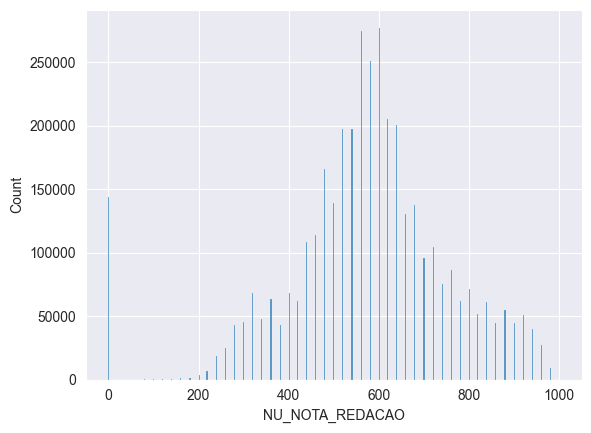

In [38]:
# Analyzing the essay (REDACAO) score
sns.histplot(data=df_enem['NU_NOTA_REDACAO'])
plt.xlabel('NU_NOTA_REDACAO')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

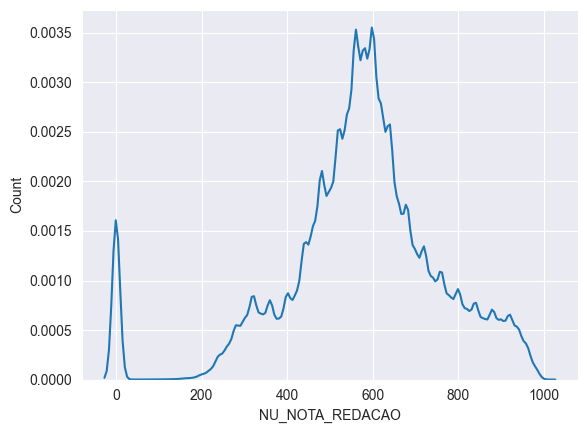

In [40]:
# We can see that the histplot is not the best for visualizing non-continuous
# scores (the previous scores could also be non-continuous, but they are almost continuous).
# Here, we don't have almost all possible score values. Let's try another approach with a density visualization.
sns.kdeplot(data=df_enem['NU_NOTA_REDACAO'])
plt.xlabel('NU_NOTA_REDACAO')
plt.ylabel('Count')

We can see that there is a significant emphasis on 0, which mostly represents people who did not take the exam.

## <a> Analyzing Demographic Information </a>

In [41]:
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,SP,36.00,M,1,3,1,BA,1,11,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,BA,23.00,M,1,1,1,BA,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,CE,39.00,F,1,3,1,CE,1,13,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,TO,25.00,F,1,1,1,TO,1,4,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,MG,22.00,F,1,1,1,MG,1,4,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B


In [44]:
# Analyzing the age of candidates. We can see that the majority of candidates are between the ages of 16 and 21.
df_enem['NU_IDADE'].value_counts().sort_index()

NU_IDADE
10.00         6
11.00         9
12.00        46
13.00       266
14.00      5267
15.00     78563
16.00    316437
17.00    847303
18.00    864186
19.00    577161
20.00    409385
21.00    290311
22.00    233036
23.00    187681
24.00    156262
25.00    128042
26.00    106880
27.00     89618
28.00     78008
29.00     66783
30.00     62491
31.00     56633
32.00     50252
33.00     46774
34.00     42821
35.00     38584
36.00     36476
37.00     35197
38.00     32656
39.00     28629
40.00     25991
41.00     22675
42.00     20411
43.00     18551
44.00     16508
45.00     15183
46.00     13509
47.00     12565
48.00     11107
49.00      9950
50.00      8799
51.00      7698
52.00      6981
53.00      6200
54.00      5527
55.00      4781
56.00      4058
57.00      3624
58.00      2774
59.00      2386
60.00      1901
61.00      1602
62.00      1384
63.00      1075
64.00       849
65.00       713
66.00       531
67.00       495
68.00       366
69.00       306
70.00       221
71.00       174

Text(0, 0.5, 'Count')

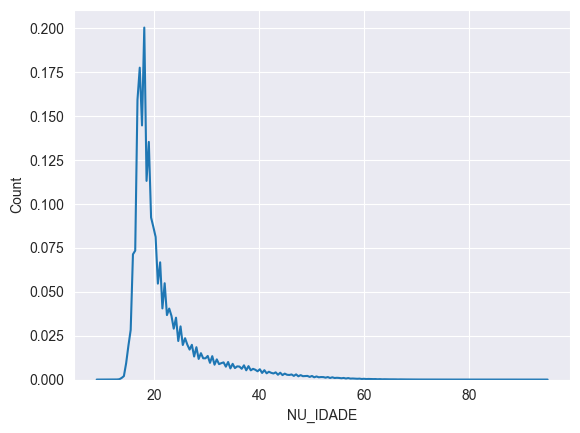

In [45]:
# Age distribution
sns.kdeplot(data=df_enem['NU_IDADE'])
plt.xlabel('NU_IDADE')
plt.ylabel('Count')

In [51]:
# Analyzing the sex of candidates. We can see that there are more female candidates than males.
df_enem['TP_SEXO'].value_counts()

TP_SEXO
F    3031822
M    2063448
Name: count, dtype: int64

In [50]:
# In porcentage
df_enem['TP_SEXO'].value_counts(normalize=True) * 100

TP_SEXO
F   59.50
M   40.50
Name: proportion, dtype: float64

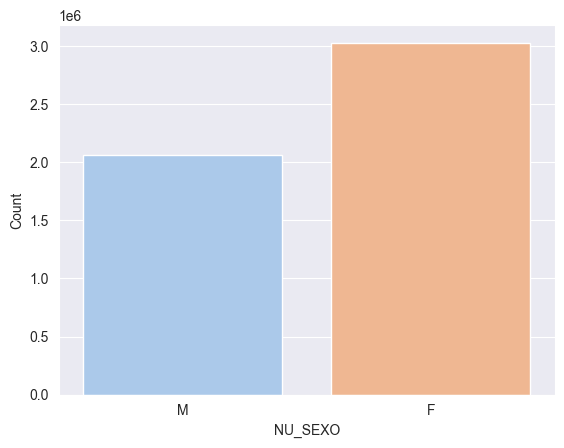

In [61]:
# Let's visualize the count
sns.countplot(data=df_enem, x='TP_SEXO', palette="pastel", hue='TP_SEXO')
plt.xlabel('NU_SEXO')
plt.ylabel('Count')
plt.show()

In [62]:
# Let's see the marital status of the candidates.
'''
0 Not informed
1 Single
2 Married/Living with partner
3 Divorced/Separated
4 Widowed
'''
df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

TP_ESTADO_CIVIL
0     206800
1    4398485
2     395855
3      87894
4       6236
Name: count, dtype: int64

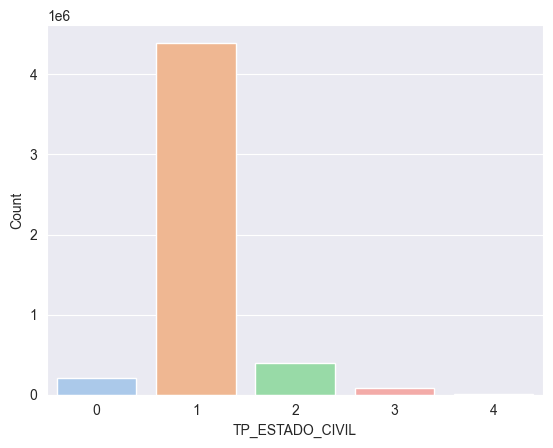

In [66]:
# We can clearly see that the majority of people are single
sns.countplot(data=df_enem, x='TP_ESTADO_CIVIL', palette="pastel", hue='TP_ESTADO_CIVIL', legend=False)
plt.xlabel('TP_ESTADO_CIVIL')
plt.ylabel('Count')
plt.show()

In [67]:
# Analyzing the race of candidates
'''
0 Not declared
1 White
2 Black
3 Brown
4 Yellow
5 Indigenous 
'''
df_enem['TP_COR_RACA'].value_counts().sort_index()

TP_COR_RACA
0     103201
1    1831779
2     648309
3    2364063
4     116162
5      31756
Name: count, dtype: int64

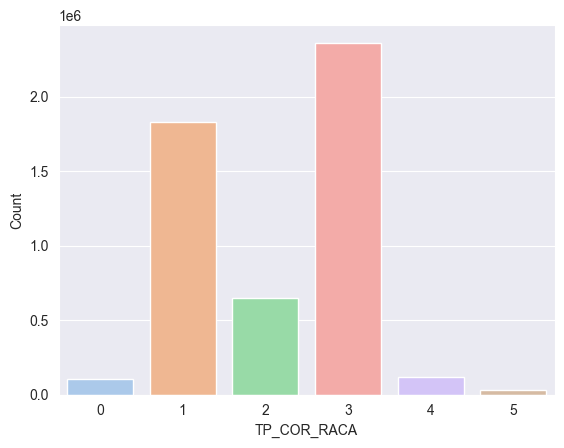

In [69]:
# We can see that the majority of people are white or brown
sns.countplot(data=df_enem, x='TP_COR_RACA', palette="pastel", hue='TP_COR_RACA', legend=False)
plt.xlabel('TP_COR_RACA')
plt.ylabel('Count')
plt.show()

In [70]:
# Let's analyze the candidates' residence
ufs = df_enem['SG_UF_RESIDENCIA'].value_counts()
ufs

SG_UF_RESIDENCIA
SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: count, dtype: int64

In [71]:
# Creating a DataFrame to visualize residences using a treemap
df_ufs = pd.DataFrame({'uf': ufs.index, 'candidates': ufs.values})
df_ufs.head()

,uf,candidates
0,SP,813772
1,MG,538896
2,BA,398095
3,RJ,338710
4,CE,295870


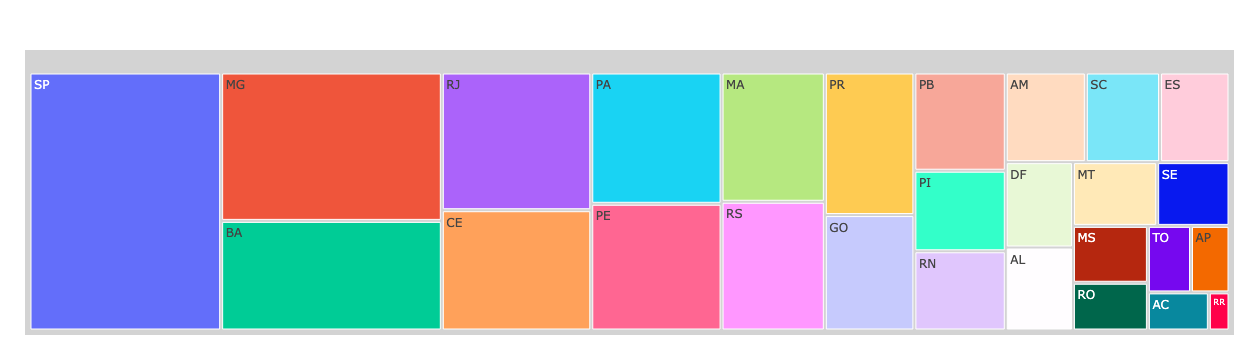

In [75]:
# Let's use a treemap with this data
# I prefer the treemap over pie charts because it is simpler to visualize the differences in proportions
# We can see that Plotly provides more pleasant and interactive visualizations
import plotly.express as px

fig = px.treemap(data_frame=df_ufs,
    path = ['uf'],
    values = 'candidates'
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In the application process, there is a socio-economic questionnaire with information about parents' education, financial level, and more.

In [78]:
# Analyzing the education level of the candidate's father or responsible man
# We can see clearly that the majority of people did not attend college
# This characteristic may be very important later on
'''
A Never studied.
B Did not complete 4th grade/5th year of Elementary School.
C Completed 4th grade/5th year but did not complete 8th grade/9th year of Elementary School.
D Completed 8th grade/9th year of Elementary School but did not complete High School.
E Completed High School but did not complete College.
F Completed College but did not complete Postgraduate.
G Completed Postgraduate.
H Don't know.
'''
df_enem['Q001'].value_counts().sort_index()

Q001
A     290615
B    1135816
C     723518
D     586620
E    1308991
F     375721
G     229183
H     444806
Name: count, dtype: int64

In [84]:
# Evaluating the impact on the data of those who answered "Don't know"
# Only about 8.7%, not obligating us to remove these entries, as it is not significant
len(df_enem.loc[df_enem['Q001'] == 'H']) / df_enem.shape[0] * 100

8.729782720052128

In [81]:
# Analyzing the education level of the candidate's mother or responsible women
# We can see clearly that the majority of people did not attend college as well
# This characteristic may be very important later on
df_enem['Q002'].value_counts().sort_index()

Q002
A     194625
B     854826
C     686198
D     667415
E    1633692
F     513711
G     399470
H     145333
Name: count, dtype: int64

In [85]:
# Only about 2.8%, not obligating us to remove these entries, as it is not significant as well
len(df_enem.loc[df_enem['Q002'] == 'H']) / df_enem.shape[0] * 100

2.8523120462703644

## <a> Considerations </a>

We can see that there is a significant difference between candidates who do not know the education level of their father compared to their mother. This difference may be due to various factors, but in Brazil, we know that there are many serious issues with fatherless homes; candidates may not even know their father. These values are just indicators that we can extract from here.

## <a> Feature Engineering </a>

Let's now tackle one of the most important techniques for extracting information from the data. With feature engineering, we can create new variables from existing ones. In this case, we will create a variable that determines whether the candidate's father or mother has a college degree or not.

In [86]:
# Creating new variables to indicate parents with a college degree
df_enem['father_has_college'] = df_enem['Q001'].isin(['F', 'G'])
df_enem['mother_has_college'] = df_enem['Q002'].isin(['F', 'G'])
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,father_has_college,mother_has_college
0,SP,36.00,M,1,3,1,BA,1,11,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B,False,False
1,BA,23.00,M,1,1,1,BA,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B,False,False
2,CE,39.00,F,1,3,1,CE,1,13,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,False,False
3,TO,25.00,F,1,1,1,TO,1,4,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B,False,False
4,MG,22.00,F,1,1,1,MG,1,4,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B,False,False


In [88]:
# We can clearly see that only about 12% of the candidates' fathers have a college degree
df_enem['father_has_college'].value_counts(normalize=True) * 100

father_has_college
False   88.13
True    11.87
Name: proportion, dtype: float64

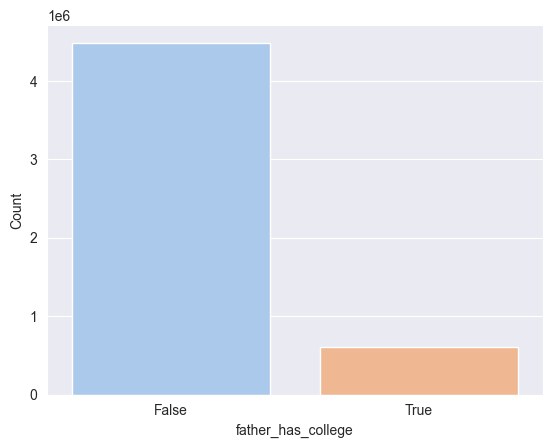

In [93]:
# Let's visualize
sns.countplot(data=df_enem, x='father_has_college', palette="pastel", hue='father_has_college', legend=False)
plt.xlabel('father_has_college')
plt.ylabel('Count')
plt.show()

In [95]:
# We can clearly see that only about 18% of the candidates' mothers have a college degree
df_enem['mother_has_college'].value_counts(normalize=True) * 100

mother_has_college
False   82.08
True    17.92
Name: proportion, dtype: float64

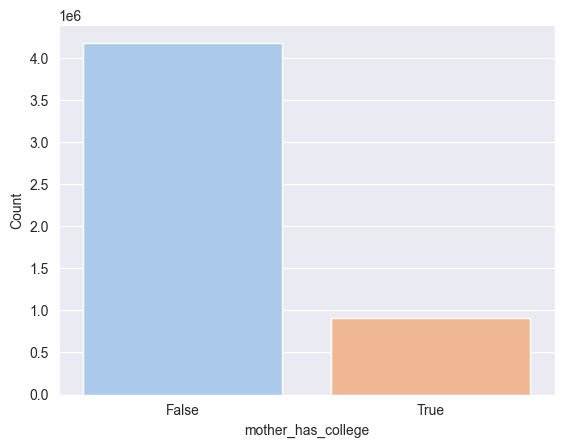

In [96]:
# Let's visualize
sns.countplot(data=df_enem, x='mother_has_college', palette="pastel", hue='mother_has_college', legend=False)
plt.xlabel('mother_has_college')
plt.ylabel('Count')
plt.show()

Let's now analyze the family income, and for that, let's create a dictionary to facilitate the process. For that, let's transform the categorical variable Q006 into a numerical variable.

In [97]:
# Analyzing family income.
'''
A No income.
B Up to R$ 998.00.
C From R$ 998.01 to R$ 1,497.00.
D From R$ 1,497.01 to R$ 1,996.00.
E From R$ 1,996.01 to R$ 2,495.00.
F From R$ 2,495.01 to R$ 2,994.00.
G From R$ 2,994.01 to R$ 3,992.00.
H From R$ 3,992.01 to R$ 4,990.00.
I From R$ 4,990.01 to R$ 5,988.00.
J From R$ 5,988.01 to R$ 6,986.00.
K From R$ 6,986.01 to R$ 7,984.00.
L From R$ 7,984.01 to R$ 8,982.00.
M From R$ 8,982.01 to R$ 9,980.00.
N From R$ 9,980.01 to R$ 11,976.00.
O From R$ 11,976.01 to R$ 14,970.00.
P From R$ 14,970.01 to R$ 19,960.00.
Q More than R$ 19,960.00.
'''
from string import ascii_uppercase

income_dictionary = dict()

# iterating over the alphabet (python is beautiful, isn't it?)
for i, letter in enumerate(ascii_uppercase):
    if i == 17:
        break
    income_dictionary[letter] = i

income_dictionary

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16}

In [101]:
# We see that the majority of parents have very low income, which may be relevant later on.
df_enem['Q006'].value_counts()

Q006
C    1311465
B    1273250
D     499616
E     475568
G     301922
A     232075
F     226251
H     192912
I     143652
J      80789
N      61649
K      58026
Q      57149
O      50203
L      44189
M      43300
P      43254
Name: count, dtype: int64

In [100]:
# Mapping function
df_enem['family_income'] = df_enem['Q006'].map(income_dictionary)
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,father_has_college,mother_has_college,family_income
0,SP,36.00,M,1,3,1,BA,1,11,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B,False,False,0
1,BA,23.00,M,1,1,1,BA,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B,False,False,2
2,CE,39.00,F,1,3,1,CE,1,13,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,False,False,1
3,TO,25.00,F,1,1,1,TO,1,4,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B,False,False,4
4,MG,22.00,F,1,1,1,MG,1,4,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B,False,False,6


Note that by transforming letters from A to Q into 0 to 16, we are establishing a relationship between the entries, i.e., the income of 1 is greater than that of 0 and so on. To implement machine learning models in the future, this step is necessary since most of them do not accept categorical variables.

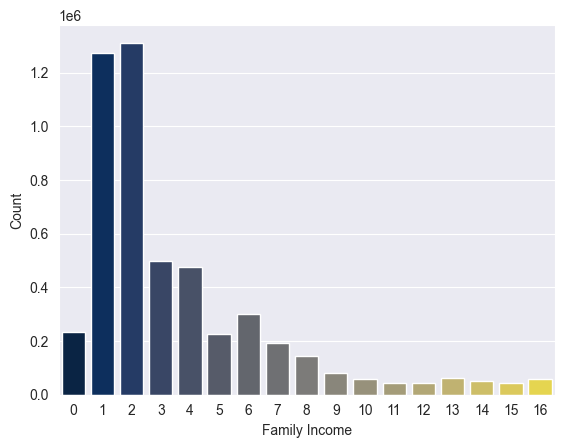

In [112]:
# Visualizing the income analysis
sns.countplot(data=df_enem, x='family_income', palette="cividis", hue='family_income', legend=False)
plt.xlabel('Family Income')
plt.ylabel('Count')
plt.show()

As mentioned earlier, we see that the majority of family incomes for the candidates are quite low. Let's keep an eye on these data for the future.

## <a> Relate grades to candidate characteristics </a>

At this stage, we can correlate variables and now extract insights that may be valuable, so let´s evaluate candidate grades in relation to these variables:

- Gender
- Race
- Special accommodations
- Mother's and father's education
- Monthly family income

In [116]:
# Creating a DataFrame with grades and gender of the candidates
# Note that there may be columns with missing values
# Our focus is not to handle these data, so they will remain as they are, and it will not affect our analysis.
df_gender = df_enem.loc[:, columns_scores + ['TP_SEXO']]
df_gender.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,NaN,NaN,NaN,NaN,NaN,M
1,NaN,NaN,NaN,NaN,NaN,M
2,NaN,NaN,NaN,NaN,NaN,F
3,483.80,503.60,537.30,392.00,460.00,F
4,513.60,575.50,570.70,677.00,860.00,F


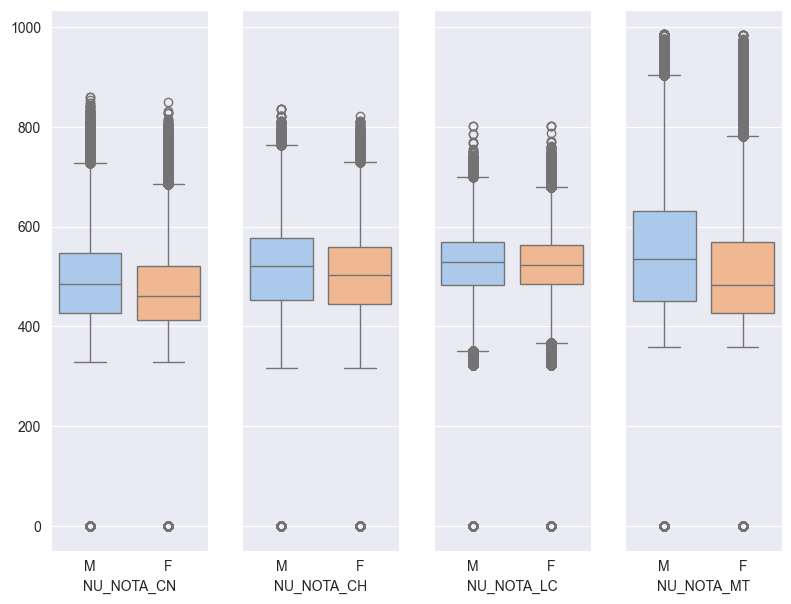

In [125]:
# Analyzing grades by gender with different colors for M and F
sns.set_style("darkgrid")
figure, axes = plt.subplots(1, 4, sharey=True, figsize=(8, 6))
plt.tight_layout()

colors = sns.color_palette("pastel")

for i in range(4):
    column_1 = columns_scores[i]
    sns.boxplot(data=df_gender, y=column_1, x='TP_SEXO', ax=axes[i], hue='TP_SEXO', palette={ 'M': colors[0], 'F': colors[1] }, legend=False)
    axes[i].set_xlabel(column_1)
    axes[i].set_ylabel('')

We can note that, for Language and Communication (LC), there are practically no differences in the median grade. For Natural Sciences (CN) and Humanities (CH), we observe that the median grades are higher for men but not significantly. However, for Mathematics (MT), the median grades for men are clearly higher than for women, as well as Q1 and Q3, indicating that the grades in Mathematics are generally better for men. However, these are only relationships we can infer, and we cannot assume a causal relationship without conducting appropriate tests.

In [121]:
# Creating a DataFrame with grades and race of the candidates
df_race = df_enem.loc[:, columns_scores + ['TP_COR_RACA']]
df_race.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,3
1,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,3
3,483.80,503.60,537.30,392.00,460.00,1
4,513.60,575.50,570.70,677.00,860.00,1


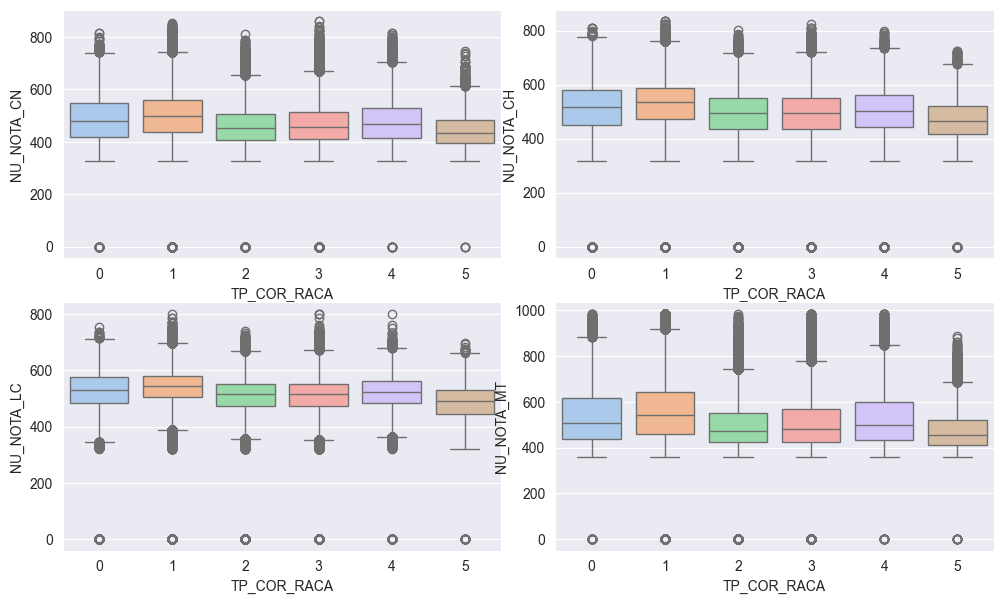

In [170]:
# Analyzing grades by race
num_required_colors = len(df_race['TP_COR_RACA'].unique())
color_palette = sns.color_palette("pastel", n_colors=num_required_colors)

sns.set_style("darkgrid")
figure, axes = plt.subplots(2, 2, figsize=(10, 6))
plt.tight_layout()

for i in range(2):
    column_1 = columns_scores[i * 2]
    column_2 = columns_scores[i * 2 + 1]

    sns.boxplot(data=df_race, y=column_1, x='TP_COR_RACA', ax=axes[i][0], hue='TP_COR_RACA',
                palette=color_palette, legend=False)
    sns.boxplot(data=df_race, y=column_2, x='TP_COR_RACA', ax=axes[i][1], hue='TP_COR_RACA',
                palette=color_palette, legend=False)

axes[i][0].set_ylabel(column_1)
axes[i][1].set_ylabel(column_2)

plt.show()

We can observe that the median of all grades is slightly higher for the white race, especially in MT, and that the indigenous race has the lowest grades, which could probably mean they will have less access to higher education (we cannot state with certainty and assume the causal effect from this analysis).

Let's now analyze the specialized assistance that candidates may need during the exam.

In [172]:
# Calculate specialized assistance
specialized_assistance_columns = ['IN_BAIXA_VISAO',
                                  'IN_CEGUEIRA',
                                  'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
                                  'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA',
                                  'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO',
                                  'IN_DISLEXIA', 'IN_DISCALCULIA',
                                  'IN_AUTISMO', 'IN_VISAO_MONOCULAR',
                                  'IN_OUTRA_DEF']

df_specialized_assistance = df_enem.loc[:, columns_scores]
df_specialized_assistance['specialized_assistance'] = df_enem.loc[:, specialized_assistance_columns].sum(axis=1) > 0
df_specialized_assistance.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,specialized_assistance
0,NaN,NaN,NaN,NaN,NaN,False
1,NaN,NaN,NaN,NaN,NaN,False
2,NaN,NaN,NaN,NaN,NaN,False
3,483.80,503.60,537.30,392.00,460.00,False
4,513.60,575.50,570.70,677.00,860.00,False


In [173]:
# Count specialized assistance
df_specialized_assistance['specialized_assistance'].value_counts()

specialized_assistance
False    5062241
True       33029
Name: count, dtype: int64

In [175]:
# Percentage
# We can see that we have 33029 candidates, representing only 0.65% of the total
df_specialized_assistance['specialized_assistance'].value_counts(normalize=True) * 100

specialized_assistance
False   99.35
True     0.65
Name: proportion, dtype: float64

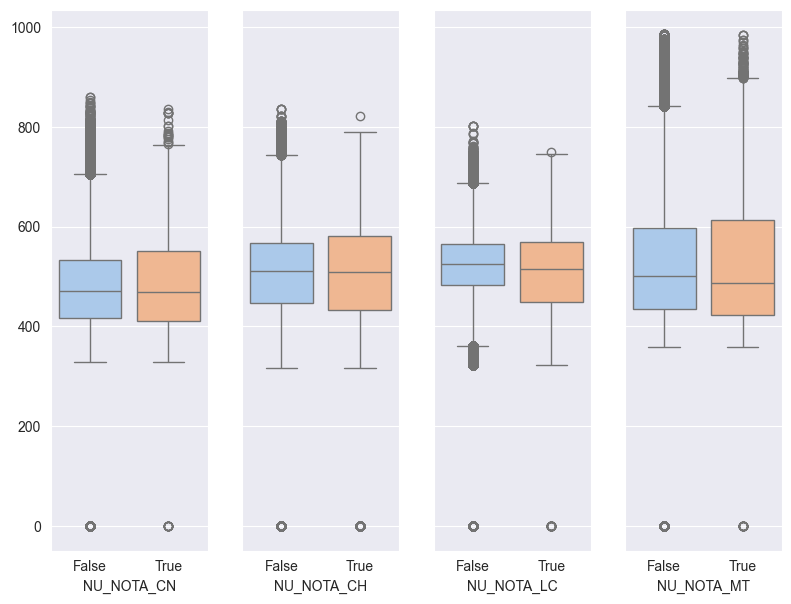

In [178]:
# Analyzing grades by specialized assistance
sns.set_style("darkgrid")
figure, axes = plt.subplots(1, 4, sharey=True, figsize=(8, 6))
plt.tight_layout()

for i in range(4):
    column_1 = columns_scores[i]
    sns.boxplot(data=df_specialized_assistance, y=column_1, x='specialized_assistance', 
                ax=axes[i], hue='specialized_assistance', palette="pastel", legend=False)
    axes[i].set_xlabel(column_1)
    axes[i].set_ylabel('')

plt.show()

From the boxplots, there is nothing conclusive, given the small difference between the medians and quartiles of the grades. We can, at least, say that candidates with specialized assistance do not seem to have a disadvantage or advantage in the exam.

In [180]:
# Creating a DataFrame with grades and parents' education level
df_parents_education = df_enem.loc[:, columns_scores + ['father_has_college', 'mother_has_college']]
df_parents_education.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,father_has_college,mother_has_college
0,NaN,NaN,NaN,NaN,NaN,False,False
1,NaN,NaN,NaN,NaN,NaN,False,False
2,NaN,NaN,NaN,NaN,NaN,False,False
3,483.80,503.60,537.30,392.00,460.00,False,False
4,513.60,575.50,570.70,677.00,860.00,False,False


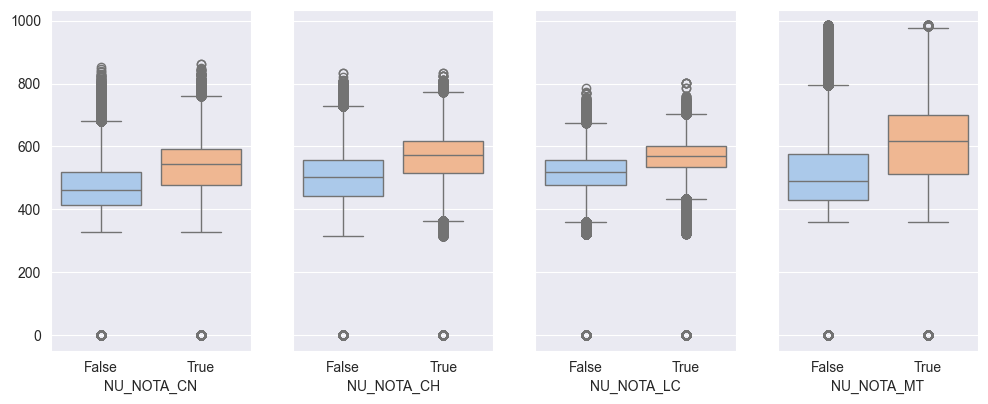

In [185]:
# Analyzing grades by father's education level
sns.set_style("darkgrid")
figure, axes = plt.subplots(1, 4, sharey=True, figsize=(10, 4))
plt.tight_layout()

for i in range(4):
    column_1 = columns_scores[i]
    sns.boxplot(data=df_parents_education, y=column_1, x='father_has_college', ax=axes[i],
                 hue='father_has_college', palette="pastel", legend=False)
    axes[i].set_xlabel(column_1)
    axes[i].set_ylabel('')

plt.show()

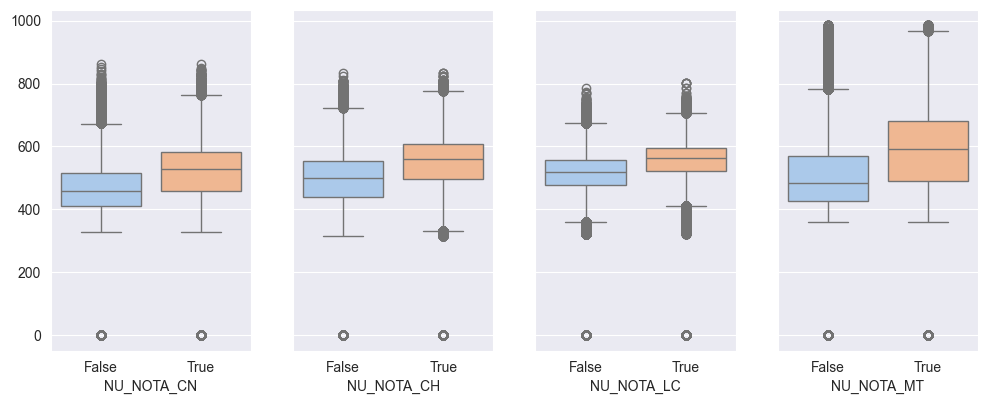

In [186]:
# Analyzing grades by mother's education level
sns.set_style("darkgrid")
figure, axes = plt.subplots(1, 4, sharey=True, figsize=(10, 4))
plt.tight_layout()

for i in range(4):
    column_1 = columns_scores[i]
    sns.boxplot(data=df_parents_education, y=column_1, x='mother_has_college', ax=axes[i],
                 hue='mother_has_college', palette="pastel", legend=False)
    axes[i].set_xlabel(column_1)
    axes[i].set_ylabel('')

plt.show()

We can see that the candidates' parents' education level has relevance to their grades. It is evident that in all subjects, the grades are higher; the first quartile (Q1) of the scores, where the parents have higher education, is higher than the median of the scores where the parents do not have higher education. This provides material to argue that there may be a cause-and-effect relationship.

<Axes: >

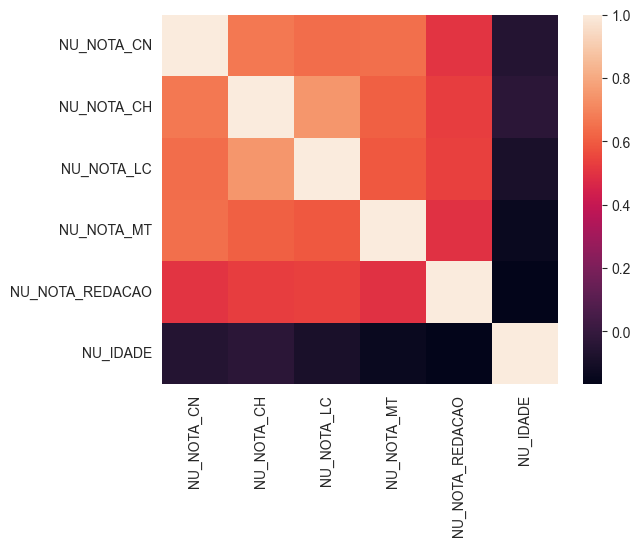

In [190]:
# Analyzing Pearson correlation between grades and age
# There is no correlation between age (NU_IDADE) and grades
df_age = df_enem.loc[:, columns_scores + ['NU_IDADE']]
correlations_age = df_age.corr()
sns.heatmap(correlations_age)

<Axes: >

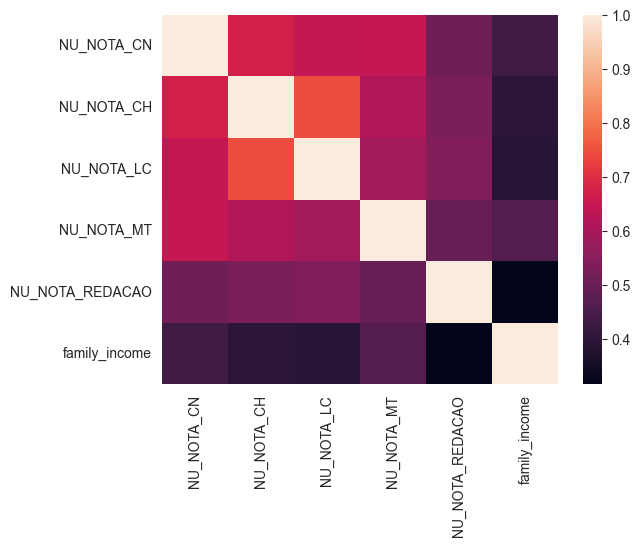

In [194]:
# Analyzing Pearson correlation between family income and age
# There is no correlation between family income and grades, except for the mathematics grade with >0.5 correlation
df_income = df_enem.loc[:, columns_scores + ['family_income']]
income_correlations = df_income.corr()
sns.heatmap(income_correlations)

## <a> Conclusions </a>

After analyzing the data with the aim of assessing possible relationships between candidate characteristics and their grades, we can state that there is some evidence of correlations between grades and:
- Race (especially indigenous candidates)
- Parents' education level (all of them but notably affecting mathematics grades)
- Family income for mathematics grades (correlation slightly above 0.5)

We couldn't confirm with this sample that gender, age, and specialized assistance have a significant relationship with grades.

It became evident that the majority of candidates come from a "humble" background, with a family income below R$2,000.00.

The "standard" ENEM candidate is a single, female, 18-year-old, brown-skinned individual, with a family income below R$1,500.00, and both parents without a completed college education.

Remember that from here, it is possible to conduct many more analyses and explore the data in much greater depth to gain insights into other questions.

I hope I have been helpful. If you have any further questions, feel free to ask anytime!